In [2]:
import pandas as pd

In [7]:
df = pd.read_csv('olympics.csv')

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver
...,...,...,...,...,...,...,...,...,...,...
29211,Beijing,2008,Wrestling,Wrestling Gre-R,"ENGLICH, Mirko",GER,Men,84 - 96kg,M,Silver
29212,Beijing,2008,Wrestling,Wrestling Gre-R,"MIZGAITIS, Mindaugas",LTU,Men,96 - 120kg,M,Bronze
29213,Beijing,2008,Wrestling,Wrestling Gre-R,"PATRIKEEV, Yuri",ARM,Men,96 - 120kg,M,Bronze
29214,Beijing,2008,Wrestling,Wrestling Gre-R,"LOPEZ, Mijain",CUB,Men,96 - 120kg,M,Gold


In [8]:
# На какой дистанции Jesse Owens выиграл медаль?

jesse_owens_event = df[df['Athlete'] == 'OWENS, Jesse']['Event'].values[0]
print(f"Jesse Owens выиграл медаль на дистанции: {jesse_owens_event}")

Jesse Owens выиграл медаль на дистанции: 100m


In [9]:
# Мужчины какой страны взяли большинство золотых медалей в бадминтоне?

badminton_gold = df[(df['Sport'] == 'Badminton') & (df['Gender'] == 'Men') & (df['Medal'] == 'Gold')]
country_most_gold_badminton = badminton_gold['NOC'].value_counts().idxmax()
sorted_badminton_gold = badminton_gold[badminton_gold['NOC'] == country_most_gold_badminton].sort_values(by='Athlete')
print(f"Мужчины из страны {country_most_gold_badminton} выиграли большинство золотых медалей в бадминтоне:")
print(sorted_badminton_gold)

Мужчины из страны INA выиграли большинство золотых медалей в бадминтоне:
            City  Edition      Sport Discipline                Athlete  NOC  \
20045  Barcelona     1992  Badminton  Badminton      BUDI KUSUMA, Alan  INA   
23701     Sydney     2000  Badminton  Badminton          GUNAWAN, Tony  INA   
25734     Athens     2004  Badminton  Badminton        HIDAYAT, Taufik  INA   
27725    Beijing     2008  Badminton  Badminton           KIDO, Markis  INA   
21771    Atlanta     1996  Badminton  Badminton   MAINAKY, Rexy Ronald  INA   
27726    Beijing     2008  Badminton  Badminton       SETIAWAN, Hendra  INA   
21772    Atlanta     1996  Badminton  Badminton  SUBAGJA, Ricky Achmad  INA   
23702     Sydney     2000  Badminton  Badminton         WIJAYA, Candra  INA   

      Gender    Event Event_gender Medal  
20045    Men  singles            M  Gold  
23701    Men  doubles            M  Gold  
25734    Men  singles            M  Gold  
27725    Men  doubles            M  Gold  


In [11]:
# Какие три страны получили наибольшее количество медалей в последние годы (с 1984 по 2008)?

top_countries = df[(df['Edition'] >= 1984) & (df['Edition'] <= 2008)]['NOC'].value_counts().head(3)
print("Три страны с наибольшим количеством медалей с 1984 по 2008 годы:")
print(top_countries)

Три страны с наибольшим количеством медалей с 1984 по 2008 годы:
NOC
USA    1837
AUS     762
GER     691
Name: count, dtype: int64


In [13]:
# Найдите мужчин - золотых медалистов по 100m

mens_100m_gold = df[(df['Event'] == '100m') & (df['Gender'] == 'Men') & (df['Medal'] == 'Gold')]
mens_100m_gold = mens_100m_gold.sort_values(by='Edition', ascending=False)
print("Мужчины-золотые медалисты по 100m:")
print(mens_100m_gold[['City', 'Edition', 'Athlete', 'NOC']])

Мужчины-золотые медалисты по 100m:
                        City  Edition                Athlete  NOC
27552                Beijing     2008            BOLT, Usain  JAM
25539                 Athens     2004         GATLIN, Justin  USA
23521                 Sydney     2000        GREENE, Maurice  USA
21598                Atlanta     1996        BAILEY, Donovan  CAN
19859              Barcelona     1992      CHRISTIE, Linford  GBR
18284                  Seoul     1988            LEWIS, Carl  USA
16794            Los Angeles     1984            LEWIS, Carl  USA
15374                 Moscow     1980           WELLS, Allan  GBR
14069               Montreal     1976       CRAWFORD, Hasely  TRI
12902                 Munich     1972         BORZOV, Valery  URS
11865                 Mexico     1968       HINES, James Ray  USA
10823                  Tokyo     1964          HAYES, Robert  USA
9924                    Rome     1960            HARY, Armin  EUA
9009   Melbourne / Stockholm     1956  MO

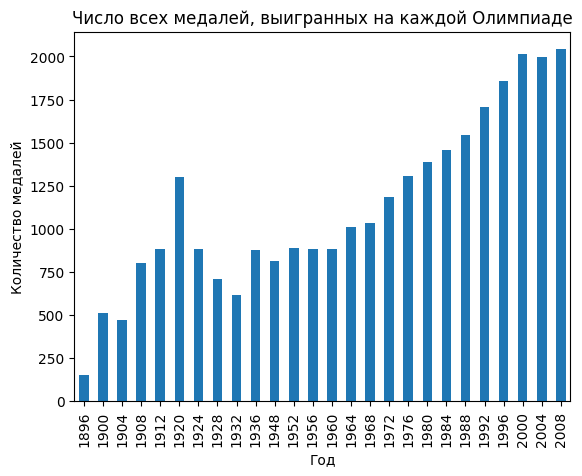

In [15]:
# Используя groupby(), постройте график - число всех медалей, выигранных на каждой Олимпиаде

import matplotlib.pyplot as plt
df.groupby('Edition').size().plot(kind='bar')
plt.title('Число всех медалей, выигранных на каждой Олимпиаде')
plt.xlabel('Год')
plt.ylabel('Количество медалей')
plt.show()

In [17]:
# Создайте список, показывающий число всех медалей, полученных каждой страной в течение всей истории Олимпийских игр

medals_by_country = df.groupby('NOC').size()
medals_by_country = medals_by_country.reset_index(name='Total Medals')
first_medal_year = df.groupby('NOC')['Edition'].min()
last_medal_year = df.groupby('NOC')['Edition'].max()
medals_by_country['First Medal Year'] = first_medal_year
medals_by_country['Last Medal Year'] = last_medal_year
print(medals_by_country)

     NOC  Total Medals  First Medal Year  Last Medal Year
0    AFG             1               NaN              NaN
1    AHO             1               NaN              NaN
2    ALG            14               NaN              NaN
3    ANZ            29               NaN              NaN
4    ARG           239               NaN              NaN
..   ...           ...               ...              ...
133  VIE             2               NaN              NaN
134  YUG           435               NaN              NaN
135  ZAM             2               NaN              NaN
136  ZIM            23               NaN              NaN
137  ZZX            48               NaN              NaN

[138 rows x 4 columns]


Text(0.5, 1.0, 'Число золотых медалей в атлетике для мужчин и женщин из США в атлетике')

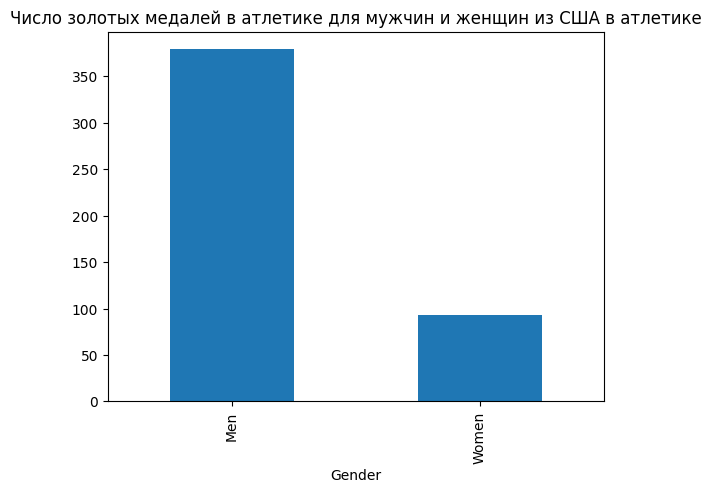

In [19]:
# Постройте график - число золотых медалей, выигранных мужчинами и женщинами из США в атлетике

usa_athletics = df[(df['NOC'] == 'USA') & (df['Sport'] == 'Athletics')]
usa_athletics_gold = usa_athletics[usa_athletics['Medal'] == 'Gold']
usa_athletics_gold.groupby('Gender').size().plot(kind='bar')
plt.title('Число золотых медалей в атлетике для мужчин и женщин из США в атлетике')